In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn import datasets, cluster
from sklearn.feature_extraction.image import grid_to_graph

### 数据集

In [11]:
digits = datasets.load_digits()
images = digits.images
images[0], images.shape

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), (1797, 8, 8))

In [13]:
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)
agglo.fit(X)

FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
                     connectivity=<64x64 sparse matrix of type '<class 'numpy.int32'>'
	with 288 stored elements in COOrdinate format>,
                     distance_threshold=None, linkage='ward', memory=None,
                     n_clusters=32,
                     pooling_func=<function mean at 0x000002850E65D288>)

In [14]:
X_reduced = agglo.transform(X)
X_restored = agglo.inverse_transform(X_reduced)
X_reduced, X_restored

(array([[ 5.8, 14. ,  5.5, ...,  0. ,  0. ,  5. ],
        [ 0. , 11.5, 16. , ..., 16. , 16. ,  0. ],
        [ 0. , 10. , 10.5, ..., 16. , 13. ,  0. ],
        ...,
        [ 1.2, 13.5, 15.5, ..., 14. , 16. ,  1. ],
        [ 3.2, 13. ,  3.5, ...,  0. , 14. ,  2. ],
        [ 0. , 14. ,  6. , ...,  6. , 15. , 10. ]]),
 array([[ 0.18181818,  0.18181818,  5.        , ...,  0.        ,
          2.33333333,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 10.        ,
          0.        ,  0.        ],
        [ 0.27272727,  0.27272727,  0.        , ..., 16.        ,
          4.66666667,  0.        ],
        ...,
        [ 0.        ,  0.        ,  1.        , ...,  6.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  2.        , ..., 12.        ,
          1.33333333,  0.        ],
        [ 0.81818182,  0.81818182, 10.        , ..., 12.        ,
          5.        ,  0.        ]]))

In [17]:
images_restored = np.reshape(X_restored, images.shape)
images_restored.shape


(1797, 8, 8)

### 绘图

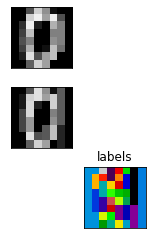

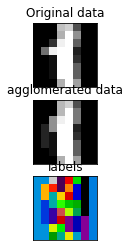

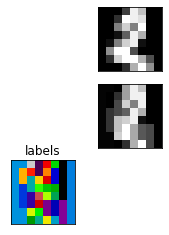

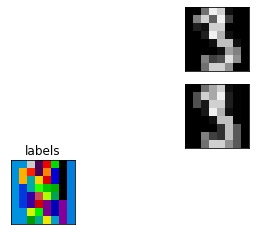

In [20]:
plt.figure(1, figsize=(4, 3.5))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.91)
for i in range(4):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    if i == 1:
        plt.title('Original data')
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(images_restored[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    
    if i == 1:
        plt.title('agglomerated data')
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(3, 4, 10)
    plt.imshow(np.reshape(agglo.labels_, images[0].shape), interpolation='nearest', 
              cmap=plt.cm.nipy_spectral)
    plt.xticks(())
    plt.yticks(())
    plt.title('labels')
    plt.show()

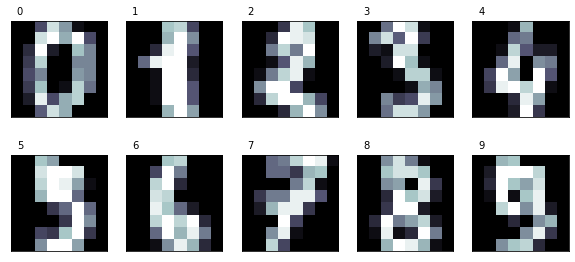

In [22]:
n_row, n_col = 2, 5

def print_digits(images, y, max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(2 * n_col, 2.26 * n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[],
                            yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, 
                    interpolation='nearest')
        # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1

print_digits(digits.images, digits.target, max_n=10)

In [31]:
digits.images.shape, digits.data.shape


((1797, 8, 8), (1797, 64))

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

data = scale(digits.data)
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
                        data, digits.target, digits.images,  test_size=0.25, 
                          random_state=42)


In [71]:
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

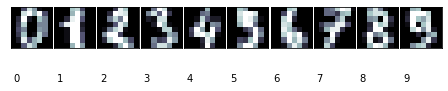

In [40]:
def print_digits(images, y, max_n=10):
     # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n and i <images.shape[0]:
         # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
         # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1

print_digits(digits.images, digits.target, max_n=10)

In [41]:
n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

In [46]:
from sklearn import cluster

In [55]:
clf = cluster.KMeans(n_clusters=10, random_state=42)


In [54]:
X_train.shape

(1347, 64)

In [56]:
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

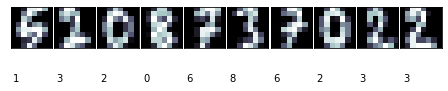

In [57]:
print_digits(images_train, clf.labels_, max_n=10)

In [59]:
clf.labels_, clf.labels_.shape

(array([1, 3, 2, ..., 6, 6, 0]), (1347,))

In [60]:
y_pred = clf.predict(X_test)

In [61]:
y_pred

array([4, 8, 8, 9, 3, 3, 5, 8, 5, 3, 0, 7, 1, 2, 1, 3, 8, 6, 8, 8, 1, 5,
       8, 6, 5, 4, 8, 5, 4, 8, 1, 8, 3, 1, 1, 4, 8, 1, 6, 4, 4, 8, 0, 8,
       4, 7, 8, 2, 4, 5, 5, 0, 8, 5, 4, 2, 8, 2, 2, 7, 2, 1, 5, 3, 1, 5,
       6, 2, 6, 8, 8, 8, 8, 6, 6, 2, 1, 5, 8, 8, 8, 2, 3, 8, 8, 2, 4, 1,
       1, 8, 0, 3, 7, 8, 8, 3, 8, 2, 1, 1, 1, 8, 5, 8, 7, 6, 5, 7, 1, 3,
       6, 6, 1, 1, 7, 8, 0, 6, 8, 6, 3, 4, 8, 7, 2, 6, 3, 6, 5, 0, 5, 5,
       6, 7, 2, 4, 4, 1, 3, 0, 2, 8, 1, 4, 8, 7, 4, 8, 2, 8, 8, 4, 4, 2,
       4, 1, 3, 8, 8, 6, 6, 3, 8, 2, 1, 5, 0, 4, 5, 6, 8, 0, 1, 0, 0, 8,
       6, 6, 3, 3, 8, 8, 8, 2, 8, 0, 3, 5, 4, 8, 8, 1, 0, 5, 9, 3, 8, 4,
       1, 0, 8, 8, 5, 6, 0, 8, 1, 0, 0, 5, 1, 1, 8, 4, 0, 8, 4, 2, 1, 5,
       3, 6, 7, 4, 1, 5, 4, 2, 8, 3, 8, 4, 6, 7, 8, 3, 1, 6, 4, 5, 0, 8,
       5, 0, 2, 3, 0, 0, 6, 5, 6, 4, 3, 3, 3, 8, 1, 0, 5, 8, 4, 2, 8, 6,
       6, 2, 0, 2, 1, 8, 0, 5, 8, 4, 2, 1, 3, 2, 2, 8, 4, 8, 8, 6, 8, 5,
       8, 8, 8, 0, 5, 8, 8, 7, 2, 5, 0, 8, 1, 2, 3,

In [64]:
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images_test, y_pred, max_n=10)

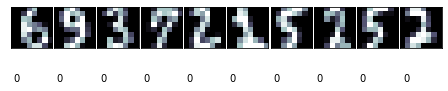

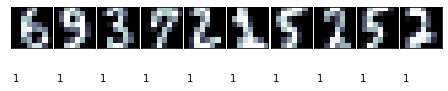

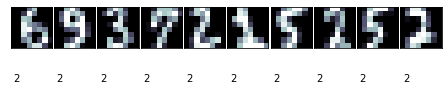

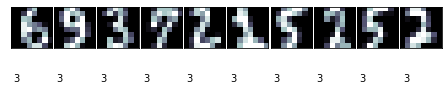

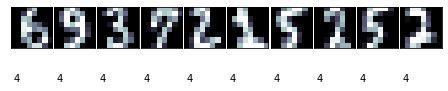

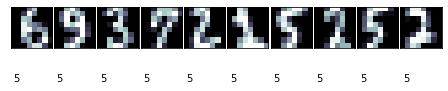

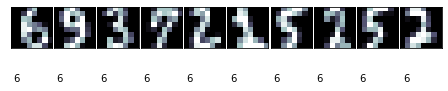

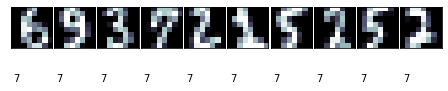

In [66]:
for i in range(8):
    print_cluster(images_test, y_pred, i)

In [67]:
# 可以直接得出训练的分数
from sklearn import metrics

In [70]:
print("Adjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))

Adjusted rand score:0.57


Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.28s	69432	0.602	0.650	0.625	0.465	0.621	0.146
random   	0.22s	69694	0.669	0.710	0.689	0.553	0.686	0.147
PCA-based	0.04s	70804	0.671	0.698	0.684	0.561	0.681	0.118
__________________________________________________________________________________


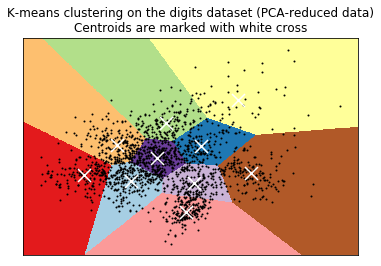

In [72]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')
# #############################################################################
# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [75]:
pca.components_.shape

(10, 64)

In [76]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### k_Means 处理进行分类数据

Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.38s	69432	0.602	0.650	0.625	0.465	0.621	0.146
random   	0.28s	69694	0.669	0.710	0.689	0.553	0.686	0.147
PCA-based	0.05s	70804	0.671	0.698	0.684	0.561	0.681	0.118
__________________________________________________________________________________


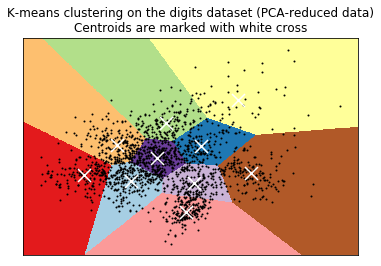

In [2]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')
# #############################################################################
# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### k_Means 
### 不知道函数的参数该写什么，可以直接在括号内 ‘shift + tab’组合键

In [1]:
# 核素数据
import pandas as pd
from sklearn.model_selection import train_test_split

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [5]:
fir = pd.read_csv('../Cs137data/dataSet_no_Bendi.csv')
fir

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0,39.0,41.0,36.0,39.0,83.0,50.0,26.0,47.0,45.0,...,40.0,39.0,49.0,48.0,73.0,74.0,81.0,82.0,32.0,0.0
1,1,33.0,20.0,28.0,31.0,41.0,43.0,52.0,53.0,31.0,...,51.0,52.0,37.0,36.0,111.0,111.0,111.0,109.0,84.0,0.0
2,2,83.0,41.0,38.0,87.0,31.0,20.0,26.0,70.0,69.0,...,112.0,111.0,81.0,28.0,32.0,39.0,37.0,48.0,51.0,0.0
3,3,111.0,114.0,112.0,42.0,39.0,36.0,38.0,40.0,25.0,...,112.0,113.0,51.0,49.0,59.0,58.0,41.0,42.0,110.0,0.0
4,4,112.0,67.0,67.0,80.0,78.0,37.0,39.0,48.0,49.0,...,118.0,116.0,110.0,105.0,89.0,27.0,107.0,106.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6628,6628,20.0,21.0,118.0,116.0,112.0,29.0,110.0,113.0,89.0,...,49.0,42.0,39.0,67.0,118.0,116.0,52.0,51.0,46.0,3.0
6629,6629,47.0,17.0,20.0,67.0,67.0,20.0,19.0,95.0,94.0,...,249.0,249.0,51.0,50.0,36.0,36.0,24.0,23.0,109.0,3.0
6630,6630,20.0,20.0,111.0,112.0,101.0,95.0,53.0,55.0,79.0,...,102.0,36.0,35.0,208.0,207.0,220.0,46.0,45.0,109.0,3.0
6631,6631,112.0,17.0,142.0,91.0,82.0,82.0,31.0,32.0,26.0,...,68.0,21.0,39.0,39.0,182.0,54.0,54.0,28.0,30.0,3.0


In [15]:
index = np.random.randint(6633, size=5000)
X_data = fir.values[index, 1: ]
X_data.shape,X_data[range(10), :]

((5000, 5001), array([[ 64.,  64., 130., ..., 114., 114.,   3.],
        [ 39., 111., 112., ...,  36.,  34.,   0.],
        [ 71.,  71., 294., ...,  61.,  61.,   0.],
        ...,
        [ 18., 520., 272., ...,  42.,  48.,   3.],
        [118., 118.,  38., ...,  66.,  66.,   3.],
        [ 20.,  42.,  41., ...,  98., 100.,   3.]]))

In [16]:
X_train = X_data[:, 0: 5000]
Y_train = X_data[:, 5000]
X_train.shape,Y_train

((5000, 5000), array([3., 0., 0., ..., 0., 1., 1.]))

In [55]:
dataSet = fir.values[:, 1: 5001]
labels = fir.values[:, -1]
dataSet.shape, dataSet[1],labels.shape,labels

((6633, 5000),
 array([ 33.,  20.,  28., ..., 111., 109.,  84.]),
 (6633,),
 array([0., 0., 0., ..., 3., 3., 3.]))

In [56]:
np.unique(labels)

array([0., 1., 2., 3.])

In [57]:
X_train, X_test,Y_train , Y_test = train_test_split(dataSet, labels)

In [58]:
np.unique(labels)

array([0., 1., 2., 3.])

In [48]:
X_train.shape, X_train, Y_train.shape, X_test.shape,Y_test.shape

((4974, 5000), array([[224., 223.,  98., ...,  69., 208., 210.],
        [ 73.,  74., 114., ...,  39., 114., 113.],
        [224., 220., 221., ..., 160., 161., 134.],
        ...,
        [161., 162., 150., ..., 223.,  97.,  95.],
        [ 32.,  32., 106., ..., 112., 114.,  84.],
        [ 15., 200.,  38., ...,  48.,  62.,  61.]]), (4974,), (1659,
  5000), (1659,))

n_digits: 4, 	 n_samples 6633, 	 n_features 5000
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	20.41s	31815649	0.931	0.999	0.964	0.975	0.964	-0.031
PCA-based	3.64s	31805667	0.931	0.788	0.854	0.767	0.854	-0.032
__________________________________________________________________________________


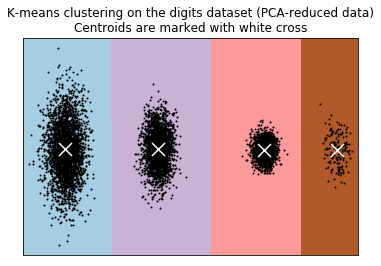

In [59]:
np.random.seed(42)

# digits = load_digits()
data = scale(dataSet)

n_samples, n_features = data.shape
n_digits = len(np.unique(labels))
# labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

# bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
#               name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')
# #############################################################################
# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [54]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [60]:
nucleus_model = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)

In [89]:
nucleus_model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
nucleus_model.fit_predict(X_test)

array([2, 2, 0, ..., 0, 0, 0])

In [90]:
n_predict = nucleus_model.predict(X_test, Y_test)

In [91]:
n_predict,Y_test

(array([2, 2, 0, ..., 1, 0, 1]), array([1., 1., 3., ..., 0., 3., 0.]))

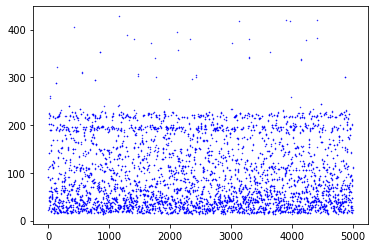

In [92]:
plt.scatter(range(5000), X_test[0], s=0.2, c='b')
plt.show()

In [111]:
a1 = np.where(n_predict==0)[0]
a2 = np.where(n_predict==1)[0]
a3 = np.where(n_predict==2)[0]
a4 = np.where(n_predict==3)[0]
a1, a2, a3, a4

(array([   2,   11,   16,   18,   22,   25,   28,   31,   36,   43,   45,
          50,   51,   53,   55,   57,   58,   63,   66,   67,   71,   74,
          80,   82,   86,   90,   93,   94,   95,   96,   97,   99,  103,
         105,  107,  112,  113,  120,  123,  127,  130,  131,  133,  135,
         141,  145,  155,  164,  165,  166,  174,  176,  177,  179,  180,
         181,  182,  184,  188,  189,  190,  198,  201,  203,  206,  209,
         210,  215,  217,  218,  221,  232,  234,  236,  238,  239,  241,
         246,  248,  252,  255,  264,  265,  266,  268,  269,  271,  278,
         282,  283,  284,  285,  288,  291,  292,  293,  299,  300,  304,
         308,  310,  312,  314,  316,  318,  324,  332,  333,  339,  341,
         344,  348,  356,  362,  364,  369,  370,  379,  381,  385,  387,
         390,  392,  393,  394,  400,  404,  407,  408,  409,  415,  417,
         421,  424,  425,  429,  430,  438,  441,  452,  453,  459,  463,
         464,  466,  468,  471,  473, 

In [81]:
np.where(n_predict==0)[0][0:3]

array([ 42,  84, 106], dtype=int64)

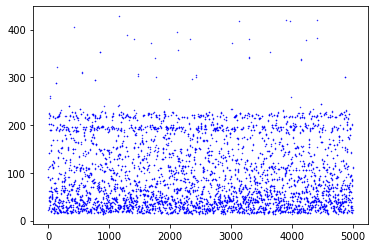

In [115]:
plt.scatter(range(5000), X_test[n_predict[a1[89]]], s=0.2, c='b')
plt.show()

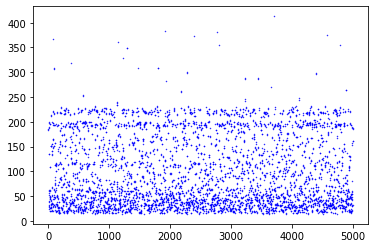

In [121]:
plt.scatter(range(5000), X_test[n_predict[a2[150]]], s=0.2, c='b')
plt.show()

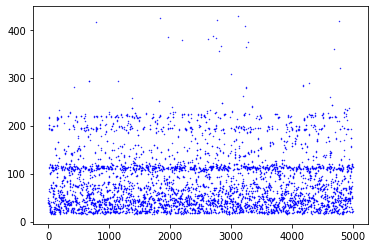

In [123]:
# 3 - > 混合核素
plt.scatter(range(5000), X_test[n_predict[a3[45]]], s=0.2, c='b')
plt.show()

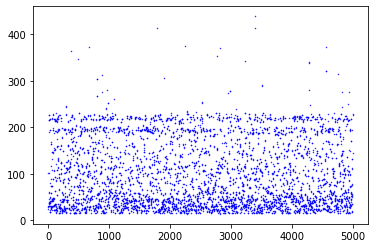

In [125]:
plt.scatter(range(5000), X_test[n_predict[a4[200]]], s=0.2, c='b')
plt.show()

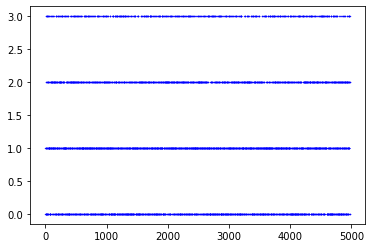

In [127]:
plt.scatter(range(X_train.shape[0]), predict[:], s=0.2, c='b')
plt.show()

In [134]:
data3 = fir.values[:, 1: ]
data3, data3.shape

(array([[ 39.,  41.,  36., ...,  82.,  32.,   0.],
        [ 33.,  20.,  28., ..., 109.,  84.,   0.],
        [ 83.,  41.,  38., ...,  48.,  51.,   0.],
        ...,
        [ 20.,  20., 111., ...,  45., 109.,   3.],
        [112.,  17., 142., ...,  28.,  30.,   3.],
        [114., 114., 113., ..., 114., 154.,   3.]]), (6633, 5001))

In [132]:
lab = data3[:, -1]
lab

array([0., 0., 0., ..., 3., 3., 3.])

In [136]:
p_num = nucleus_model.fit_predict(data3[:, 0: 5001])
p_num

array([0, 0, 0, ..., 3, 3, 3])

In [143]:
num =  0
for i in  range(p_num.shape[0]):
    if p_num[i] == lab[i]:
        num += 1
    else:
        print(i, end='  ')
num

4271  4272  4273  4274  4275  4276  4277  4278  4279  4280  4281  4282  4283  4284  4285  4286  4287  4288  4289  4290  4291  4292  4293  4294  4295  4296  4297  4298  4299  4300  4301  4302  4303  4304  4305  4306  4307  4308  4309  4310  4311  4312  4313  4314  4315  4316  4317  4318  4319  4320  4321  4322  4323  4324  4325  4326  4327  4328  4329  4330  4331  4332  4333  4334  4335  4336  4337  4338  4339  4340  4341  4342  4343  4344  4345  4346  4347  4348  4349  4350  4351  4352  4353  4354  4355  4356  4357  4358  4359  4360  4361  4362  4363  4364  4365  4366  4367  4368  4369  4370  4371  4372  4373  4374  4375  4376  4377  4378  4379  4380  4381  4382  4383  4384  4385  4386  4387  4388  4389  4390  4391  4392  4393  4394  4395  4396  4397  4398  4399  4400  4401  4402  4403  4404  4405  4406  4407  4408  4409  4410  4411  4412  4413  4414  4415  4416  4417  4418  4419  4420  4421  4422  4423  4424  4425  4426  4427  4428  4429  4430  4436  4446  4447  4454  4455  4458  4459

6194

In [138]:
num/len(lab)

0.9338157696366651

In [100]:
metrics.adjusted_rand_score(Y_test, n_predict)

0.7777648754754656

In [101]:
k_model1 = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)

In [103]:
predict = k_model1.fit_predict(X_train)

In [104]:
predict

array([0, 1, 1, ..., 2, 3, 0])

In [105]:
metrics.adjusted_rand_score(Y_train, predict)

0.7953884552464342

In [106]:
Y_train

array([1., 3., 3., ..., 0., 1., 1.])

In [107]:
num = 0
for i in range(Y_train.shape[0]):
    if Y_train[i] == predict[i]:
        num += 1
num

126

In [144]:
predict_model = nucleus_model.fit(X_train)

In [145]:
predict_model.labels_

array([1, 2, 2, ..., 3, 0, 1])

In [161]:
def print_fig(images, y, max_n=10):
     # set up the figure size in inches
    fig = plt.figure(figsize=(60, 60))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n and i <images.shape[0]:
         # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.scatter(range(5000), images[i], cmap=plt.cm.bone, s=0.1, c='r')
         # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1

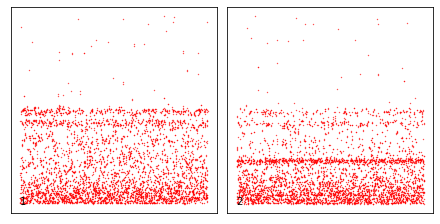

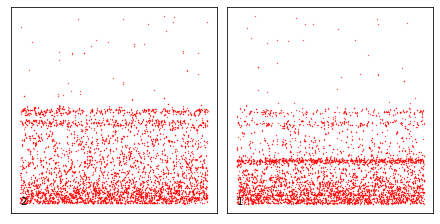

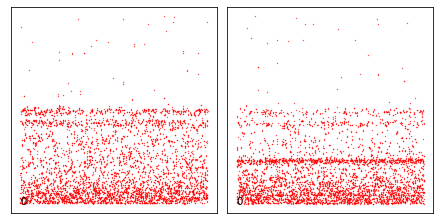

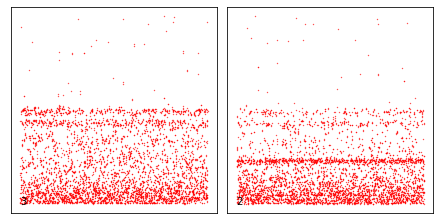

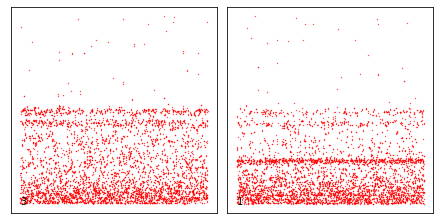

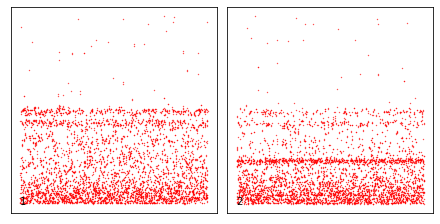

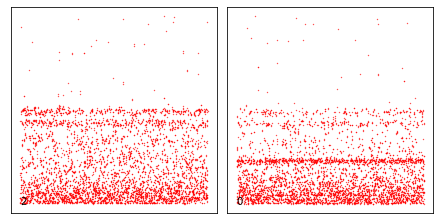

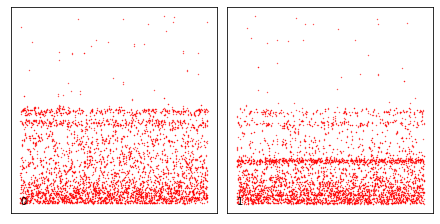

In [164]:
for i in range(8):
    print_fig(X_train, predict_model.labels_[i * 2: ], 2)